Problem definition

Facilitate the process of visa approvals.
Predicting whether a visa application (case_status) will be Certified or Denied based on applicant and employer features.

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data
df = pd.read_csv('/content/sample_data/EasyVisa.csv')
# returns the first 5 rows
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

The data set has 25480 observations and 12 features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


no_of_employees and prevailing_wage are numeric and yr_of_estab is date type. The remaining all are object.

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


No null values.

In [ ]:
df['has_job_experience'] = df['has_job_experience'].replace({'N': 0, 'Y': 1})
df['requires_job_training'] = df['requires_job_training'].replace({'N': 0, 'Y': 1})
df['case_status'] = df['case_status'].replace({'Denied': 0, 'Certified': 1})
df['full_time_position'] = df['full_time_position'].replace({'N': 0, 'Y': 1})

Replaced N and Y with 0 and 1 for has_job_experience and requires_job_training.
Case status replaced Certified with 1 and denied with 0.

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,EZYV02,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,EZYV03,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,EZYV04,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,EZYV05,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


In [ ]:
num_cols=['no_of_employees','prevailing_wage']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
has_job_experience,25480.0,0.580926,0.493417,0.0000,0.00,1.00,1.0000,1.00
requires_job_training,25480.0,0.115973,0.320199,0.0000,0.00,0.00,0.0000,1.00
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
full_time_position,25480.0,0.893760,0.308151,0.0000,1.00,1.00,1.0000,1.00
case_status,25480.0,0.667896,0.470977,0.0000,0.00,1.00,1.0000,1.00


In [ ]:
df.drop('case_id',inplace=True, axis=1)

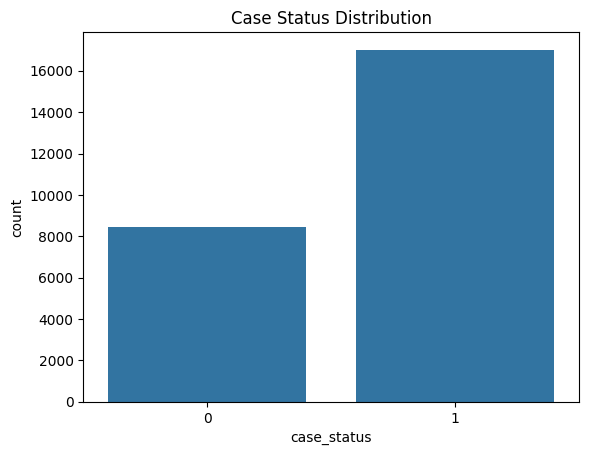

In [ ]:
# Target distribution
sns.countplot(x="case_status", data=df)
plt.title("Case Status Distribution")
plt.show()

Certified is twice the count of denied case status. So Majority have been certified. The case status is imbalanced. This would create bias towards the majority class

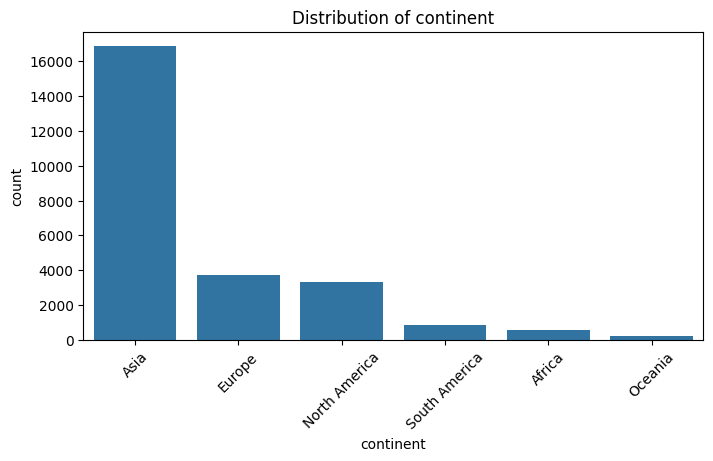

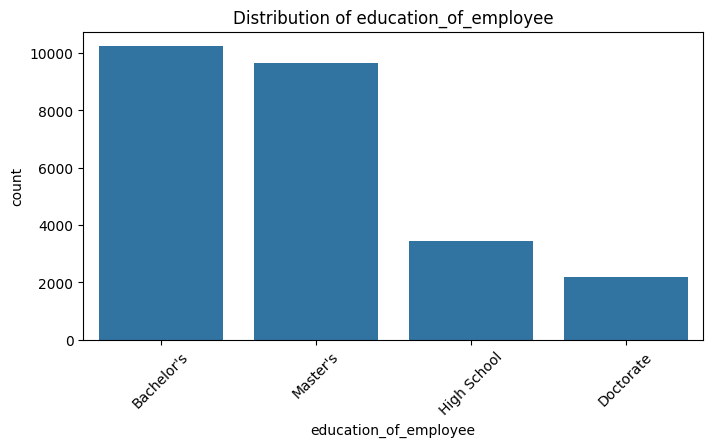

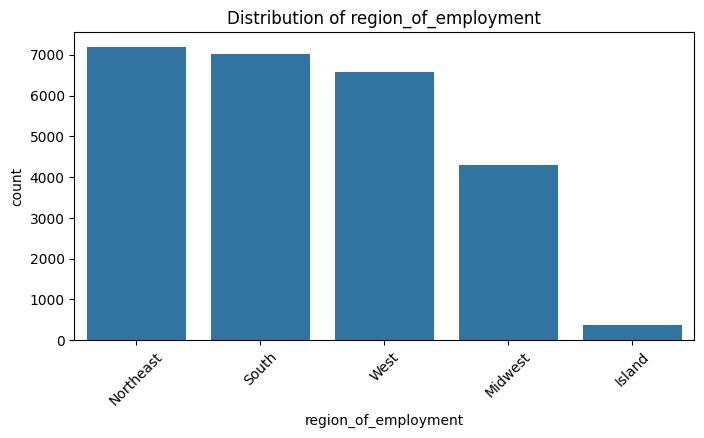

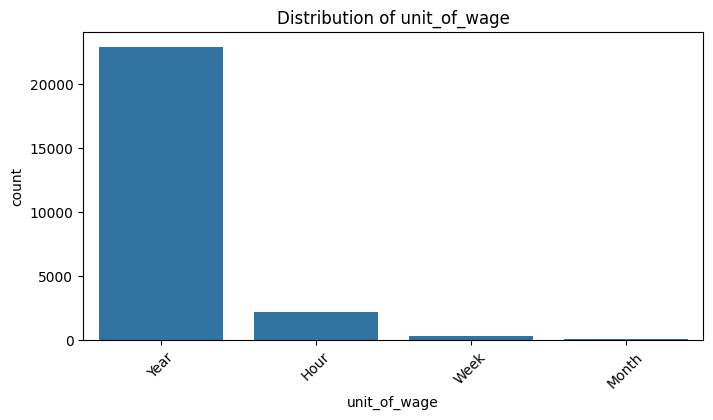

In [ ]:
# Univariate analysis of categorical columns
cat_cols=cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

The Univariate analysis states that majority of the candidates are from asia. Majority have wages paid yearly. Region of employment has equal distribution of candidates but only island has least compared to the rest. Majority have bachelors and masters degree.

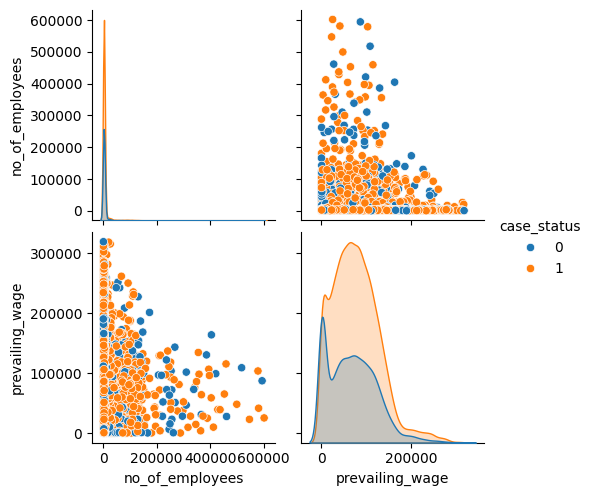

In [ ]:
#Multivariate Analysis
sns.pairplot(df, vars=num_cols, hue="case_status")
plt.show()

Both are skewed towards left. This indicates candidates have prevailing wage less than 200000 and no of employees is less too.

In [ ]:
df.groupby('case_status')['case_status'].value_counts()

,count
case_status,
0,8462
1,17018


In [ ]:
df.groupby('has_job_experience')['has_job_experience'].value_counts()

,count
has_job_experience,
0,10678
1,14802


In [ ]:
df.groupby('requires_job_training')['requires_job_training'].value_counts()

,count
requires_job_training,
0,22525
1,2955


Majority of the candidates requires job training.

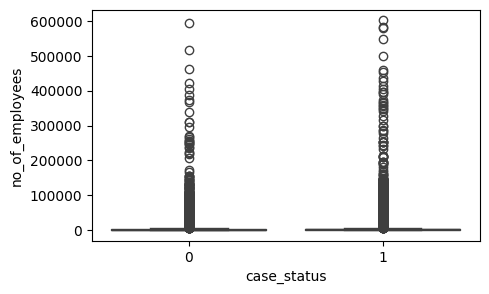

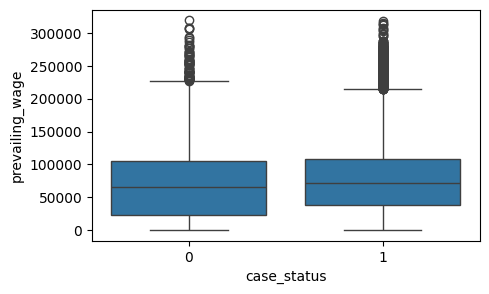

In [ ]:
# Bivariate Example
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="case_status", y=col, data=df)
    plt.show()

In [ ]:
# Data preprocessing using label encoder to convert to numeric for the cols that are objective data type.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# using standardscaler to scale the data as the units are different.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
sc.fit_transform(df)

array([[-0.54053344,  0.38005614, -1.17737617, ..., -3.23171394,
         0.3447736 , -1.41813557],
       [-0.54053344,  1.12347934,  0.84934622, ...,  0.32173495,
         0.3447736 ,  0.7051512 ],
       [-0.54053344, -1.10679025, -1.17737617, ...,  0.32173495,
         0.3447736 , -1.41813557],
       ...,
       [-0.54053344,  1.12347934,  0.84934622, ...,  0.32173495,
        -2.90045409,  0.7051512 ],
       [-0.54053344,  1.12347934,  0.84934622, ...,  0.32173495,
         0.3447736 ,  0.7051512 ],
       [-0.54053344, -1.10679025,  0.84934622, ...,  0.32173495,
         0.3447736 ,  0.7051512 ]])

In [ ]:
# Preparing the data. Split the data.
x=df.drop('case_status',axis=1)
y=df['case_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape
print(y_train.value_counts(),'\n')
x_test.shape
print(y_test.value_counts(),'\n')

case_status
1    13617
0     6767
Name: count, dtype: int64 

case_status
1    3401
0    1695
Name: count, dtype: int64 



In [ ]:
print("Train class distribution (%):")
print(y_train.value_counts(normalize=True) * 100, '\n')

print("Test class distribution (%):")
print(y_test.value_counts(normalize=True) * 100, '\n')

Train class distribution (%):
case_status
1    66.802394
0    33.197606
Name: proportion, dtype: float64 

Test class distribution (%):
case_status
1    66.738619
0    33.261381
Name: proportion, dtype: float64 



The class certified is majority above 60%.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00     13617

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384

[[ 6767     0]
 [    0 13617]]


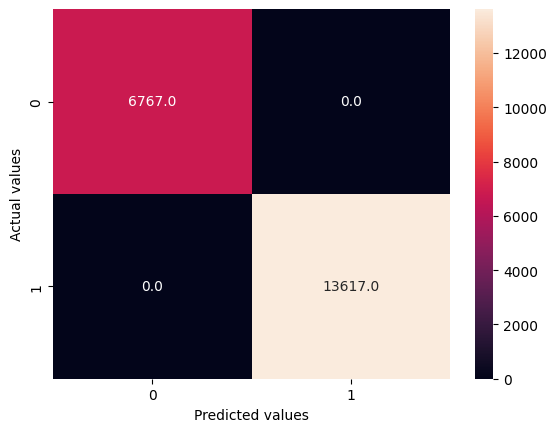

In [ ]:
def model_performance_classification_sklearn(model, y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true,y_pred))
    cm=confusion_matrix(y_true,y_pred)
    print(cm)
    sns.heatmap(cm,annot=True,fmt='.1f')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()


dtree = DecisionTreeClassifier(random_state=1)

dtree.fit(x_train, y_train)
y_train_pred = dtree.predict(x_train)

model_performance_classification_sklearn(dtree, y_train, y_train_pred)



The model is overfitting.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00     13617

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384

[[ 6767     0]
 [    0 13617]]


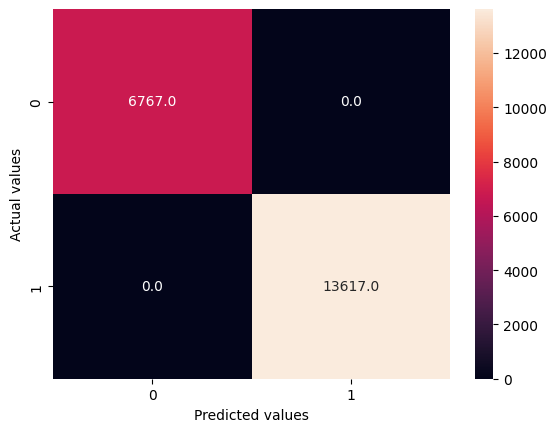

In [ ]:
rf = RandomForestClassifier(random_state=1)

rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)

model_performance_classification_sklearn(rf, y_train, y_train_pred)

Both decision tree and random forest showed 100 in accuracy, precision and recall in the training model.This may not do well in the test data.This overfits the data.

Accuracy: 0.7282182103610675
Precision: 0.7426254130369481
Recall: 0.907762355878681
F1 Score: 0.8169321260987377
              precision    recall  f1-score   support

           0       0.66      0.37      0.47      6767
           1       0.74      0.91      0.82     13617

    accuracy                           0.73     20384
   macro avg       0.70      0.64      0.64     20384
weighted avg       0.72      0.73      0.70     20384

[[ 2483  4284]
 [ 1256 12361]]


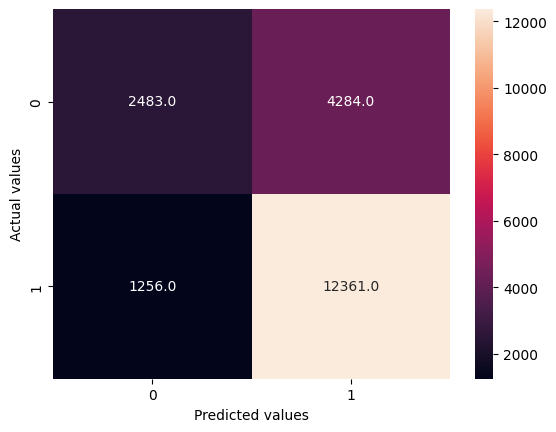

In [ ]:
model = AdaBoostClassifier(random_state=1)

model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

model_performance_classification_sklearn(model, y_train, y_train_pred)

Adaboost model result:The recall is 90 but it did not do well in predicting certified candidates. It failed to predict 1256 candidates who were actually certified.

Accuracy: 0.7525510204081632
Precision: 0.7744062479994879
Recall: 0.8883748255856649
F1 Score: 0.8274847800807169
              precision    recall  f1-score   support

           0       0.68      0.48      0.56      6767
           1       0.77      0.89      0.83     13617

    accuracy                           0.75     20384
   macro avg       0.73      0.68      0.70     20384
weighted avg       0.74      0.75      0.74     20384

[[ 3243  3524]
 [ 1520 12097]]


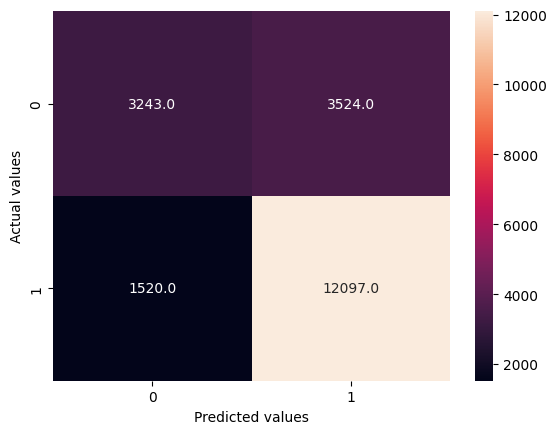

In [ ]:
model = GradientBoostingClassifier(random_state=1)

model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

model_performance_classification_sklearn(model, y_train, y_train_pred)

The accuracy is 75 and recall is 80 but it did not do well in predicting certified candidates. It failed to predict 1520 candidates who were actually certified.

Accuracy: 0.9855278649921507
Precision: 0.9919497784342688
Recall: 0.9863406036571932
F1 Score: 0.9891372390175646
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6767
           1       0.99      0.99      0.99     13617

    accuracy                           0.99     20384
   macro avg       0.98      0.99      0.98     20384
weighted avg       0.99      0.99      0.99     20384

[[ 6658   109]
 [  186 13431]]


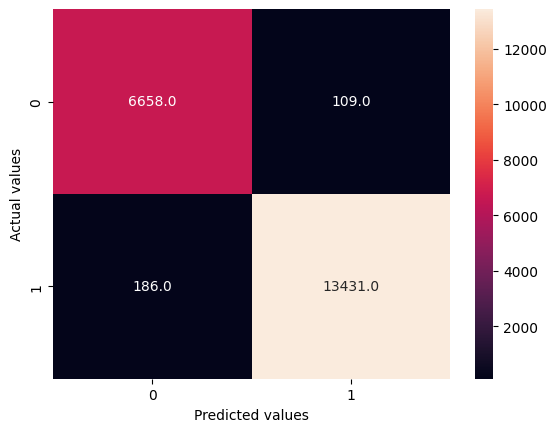

In [ ]:
model = BaggingClassifier(random_state=1)

model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

model_performance_classification_sklearn(model, y_train, y_train_pred)

The accuracy is 98 and recall is 98 and it did  well in predicting certified candidates. It only failed to predict 186 candidates who were actually certified but it correctly predicted 13431 out of 13617. Majority has been predicted correctly and only very few were predicted model.

In [ ]:
from imblearn.over_sampling import SMOTE


sm=SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over,y_train_over=sm.fit_resample(x_train,y_train)

print(x_train_over.shape)
print(y_train_over.shape)

(27234, 10)
(27234,)


In [ ]:
print("Train class distribution (%):")
print(y_train_over.value_counts(normalize=True) * 100, '\n')

Train class distribution (%):
case_status
0    50.0
1    50.0
Name: proportion, dtype: float64 



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13617
           1       1.00      1.00      1.00     13617

    accuracy                           1.00     27234
   macro avg       1.00      1.00      1.00     27234
weighted avg       1.00      1.00      1.00     27234

[[13617     0]
 [    0 13617]]


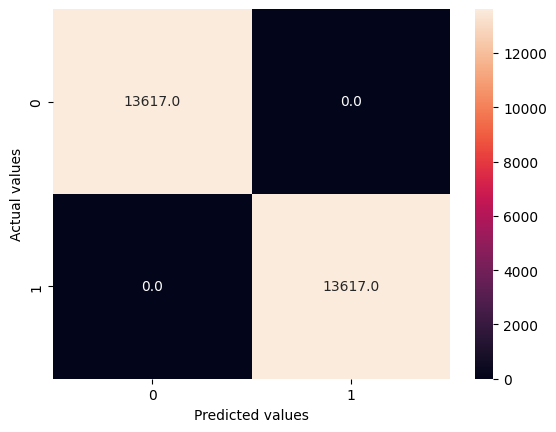

In [ ]:
dtree2= DecisionTreeClassifier(random_state=1)

dtree2.fit(x_train_over, y_train_over)
y_train_over_pred=dtree2.predict(x_train_over)

model_performance_classification_sklearn(dtree2, y_train_over, y_train_over_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13617
           1       1.00      1.00      1.00     13617

    accuracy                           1.00     27234
   macro avg       1.00      1.00      1.00     27234
weighted avg       1.00      1.00      1.00     27234

[[13617     0]
 [    0 13617]]


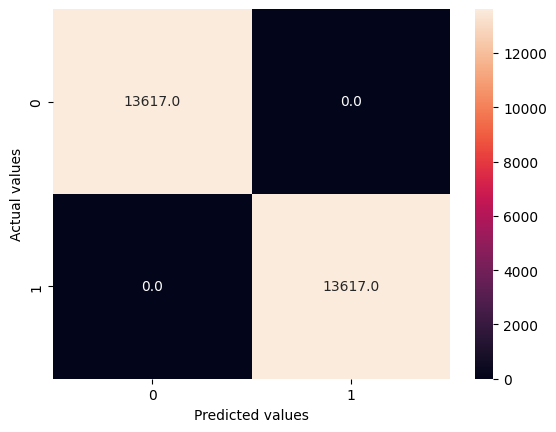

In [ ]:
rf = RandomForestClassifier(random_state=1)

rf.fit(x_train_over, y_train_over)
y_train_over_pred=rf.predict(x_train_over)

model_performance_classification_sklearn(rf, y_train_over, y_train_over_pred)

It has 100 per recall but may fail to predict who were actually certified in test data.

Accuracy: 0.9840640376000588
Precision: 0.9935604642456008
Recall: 0.974443710068297
F1 Score: 0.9839092392110337
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13617
           1       0.99      0.97      0.98     13617

    accuracy                           0.98     27234
   macro avg       0.98      0.98      0.98     27234
weighted avg       0.98      0.98      0.98     27234

[[13531    86]
 [  348 13269]]


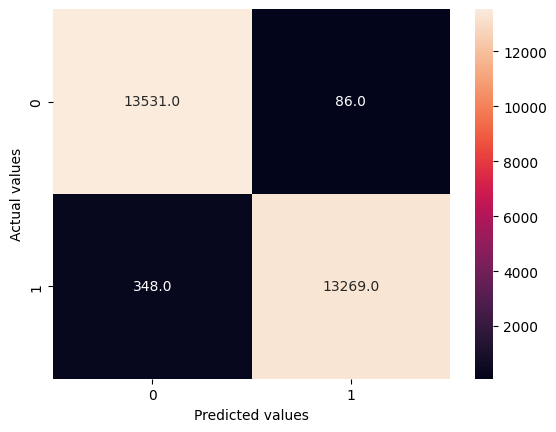

In [ ]:
model2 = BaggingClassifier(random_state=1)

model2.fit(x_train_over, y_train_over)
y_train_over_pred = model2.predict(x_train_over)

model_performance_classification_sklearn(model2, y_train_over, y_train_over_pred)

Accuracy and recall is high but failed to predict 348 candidates who were actually certified.

Accuracy: 0.7235808180950283
Precision: 0.7237780227857405
Recall: 0.7231401924065506
F1 Score: 0.7234589670119757
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     13617
           1       0.72      0.72      0.72     13617

    accuracy                           0.72     27234
   macro avg       0.72      0.72      0.72     27234
weighted avg       0.72      0.72      0.72     27234

[[9859 3758]
 [3770 9847]]


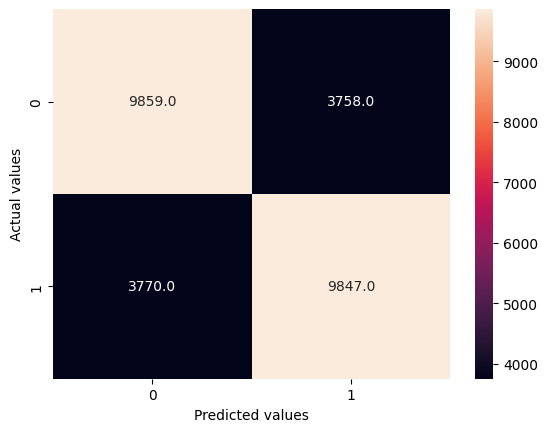

In [ ]:
model2 = AdaBoostClassifier(random_state=1)

model2.fit(x_train_over, y_train_over)
y_train_over_pred = model2.predict(x_train_over)

model_performance_classification_sklearn(model2, y_train_over, y_train_over_pred)

Accuracy and recall is 72 but failed to predict 3770 candidates who were actually certified.

Accuracy: 0.7413527208636264
Precision: 0.7271407837445574
Recall: 0.7726371447455387
F1 Score: 0.7491988891262551
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     13617
           1       0.73      0.77      0.75     13617

    accuracy                           0.74     27234
   macro avg       0.74      0.74      0.74     27234
weighted avg       0.74      0.74      0.74     27234

[[ 9669  3948]
 [ 3096 10521]]


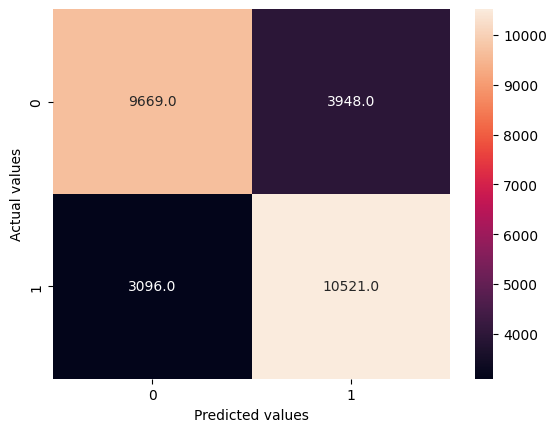

In [ ]:
model2 = GradientBoostingClassifier(random_state=1)

model2.fit(x_train_over, y_train_over)
y_train_over_pred = model2.predict(x_train_over)

model_performance_classification_sklearn(model2, y_train_over, y_train_over_pred)

Accuracy and recall are 74 and 77 but failed to predict 3096 candidates who were actually certified.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00      6767

    accuracy                           1.00     13534
   macro avg       1.00      1.00      1.00     13534
weighted avg       1.00      1.00      1.00     13534

[[6767    0]
 [   0 6767]]


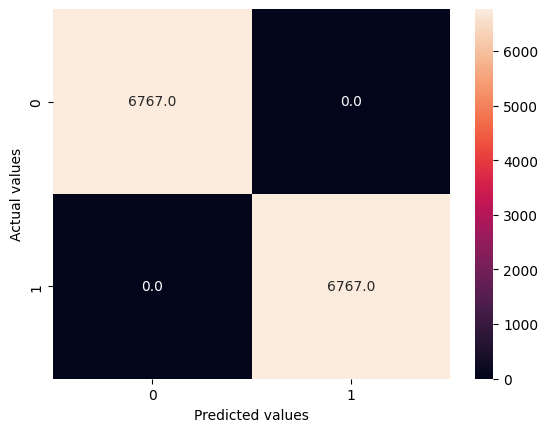

In [ ]:
model3 = DecisionTreeClassifier(random_state=1)

model3.fit(x_train_un, y_train_un)

y_train_un_pred = model3.predict(x_train_un)

model_performance_classification_sklearn(model3, y_train_un, y_train_un_pred)

Accuracy and recall are 100. This may overfit in the test data and may fail to predict.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00      6767

    accuracy                           1.00     13534
   macro avg       1.00      1.00      1.00     13534
weighted avg       1.00      1.00      1.00     13534

[[6767    0]
 [   0 6767]]


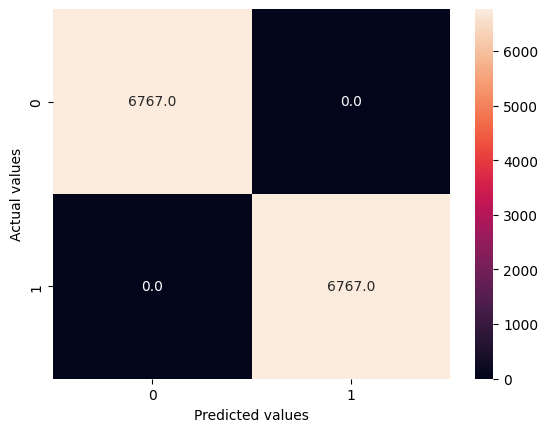

In [ ]:
model3 = RandomForestClassifier(random_state=1)

model3.fit(x_train_un, y_train_un)

y_train_un_pred = model3.predict(x_train_un)

model_performance_classification_sklearn(model3, y_train_un, y_train_un_pred)

Accuracy and recall are 100 but may fail to predict in test data.

Accuracy: 0.9801241318161666
Precision: 0.9903410805916089
Recall: 0.9697059258164622
F1 Score: 0.979914880907937
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6767
           1       0.99      0.97      0.98      6767

    accuracy                           0.98     13534
   macro avg       0.98      0.98      0.98     13534
weighted avg       0.98      0.98      0.98     13534

[[6703   64]
 [ 205 6562]]


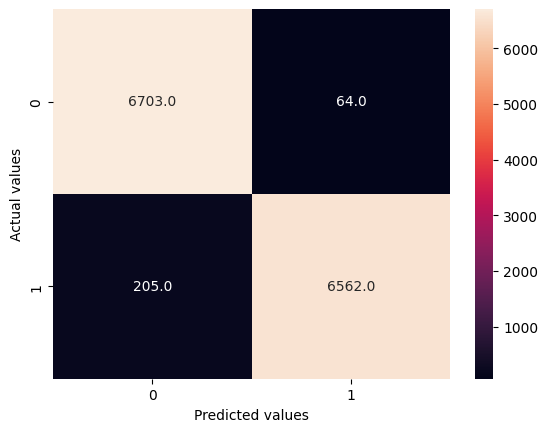

In [ ]:
model3 = BaggingClassifier(random_state=1)

model3.fit(x_train_un, y_train_un)

y_train_un_pred = model3.predict(x_train_un)

model_performance_classification_sklearn(model3, y_train_un, y_train_un_pred)

Accuracy and recall are 98 and 96 but failed to predict 205 candidates who were actually certified. But we cannot say it may predict the same in test data.

Accuracy: 0.6900398995123392
Precision: 0.6643660531697342
Recall: 0.7681395005172159
F1 Score: 0.7124940031526283
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      6767
           1       0.66      0.77      0.71      6767

    accuracy                           0.69     13534
   macro avg       0.69      0.69      0.69     13534
weighted avg       0.69      0.69      0.69     13534

[[4141 2626]
 [1569 5198]]


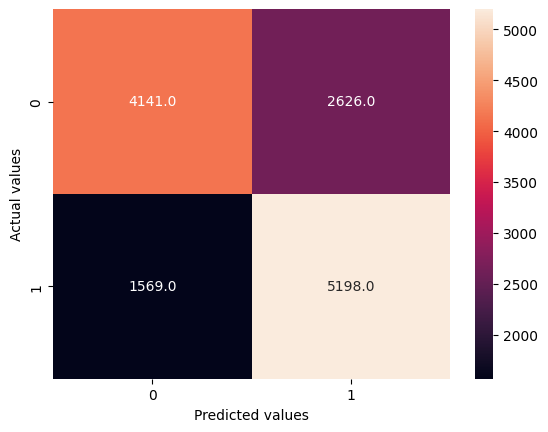

In [ ]:
model3 = AdaBoostClassifier(random_state=1)

model3.fit(x_train_un, y_train_un)

y_train_un_pred = model3.predict(x_train_un)

model_performance_classification_sklearn(model3, y_train_un, y_train_un_pred)

Accuracy and recall are 69 and 76 but failed to predict 1569 candidates who were actually certified.

Accuracy: 0.7186345500221664
Precision: 0.7094125973106865
Recall: 0.7406531697945914
F1 Score: 0.7246963562753036
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      6767
           1       0.71      0.74      0.72      6767

    accuracy                           0.72     13534
   macro avg       0.72      0.72      0.72     13534
weighted avg       0.72      0.72      0.72     13534

[[4714 2053]
 [1755 5012]]


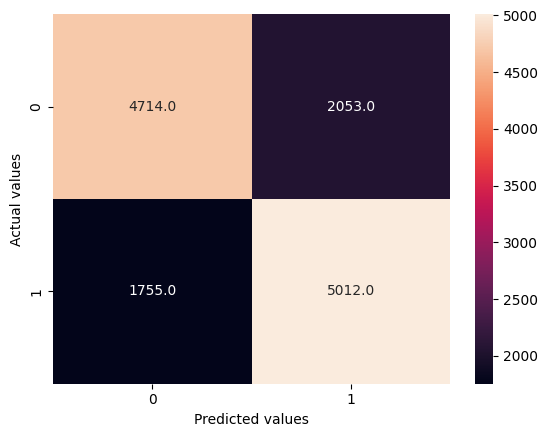

In [ ]:
model3 = GradientBoostingClassifier(random_state=1)

model3.fit(x_train_un, y_train_un)

y_train_un_pred = model3.predict(x_train_un)

model_performance_classification_sklearn(model3, y_train_un, y_train_un_pred)

Accuracy and recall are 71 and 74 but failed to predict 1755 candidates who were actually certified.

In [ ]:
#  Hyperparameter Tuning for Bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_bag = {
    "n_estimators": [50, 100, 200],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False]
}

# Using Decision Tree as base estimator (common choice)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

grid_bag = GridSearchCV(bagging, param_grid_bag, cv=3, scoring="accuracy")
grid_bag.fit(x_train, y_train)

print("Best Bagging Params:", grid_bag.best_params_)
print("Best Bagging Score:", grid_bag.best_score_)


Best Bagging Params: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
Best Bagging Score: 0.7309163122693566


In [ ]:
#  Hyperparameter Tuning for AdaBoost
param_grid_ab = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2]
}

grid_ab = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ab, cv=3, scoring="accuracy")
grid_ab.fit(x_train, y_train)
print("Best AdaBoost Params:", grid_ab.best_params_)
print("Best  Score:", grid_ab.best_score_)

Best AdaBoost Params: {'learning_rate': 0.2, 'n_estimators': 200}
Best  Score: 0.712863122310882


In [ ]:
#  Hyperparameter Tuning for GradientBoostingClassifier
param_grid_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring="accuracy")
grid_gb.fit(x_train, y_train)
print("Best GB Params:", grid_gb.best_params_)
print("Best  Score:", grid_gb.best_score_)

Best GB Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best  Score: 0.7472037072056178


Selected Bagging , AdaBoost and GradientBoosting for hyperparameter tuning because they had accuracy around 69 above , recall also was 70 percent and just did not predict few correctly but could predict majority correctly and model was not showing any overfit. So chose to tune the models and improve their performance. Doing this would try to improve the predictions in the test data with any overfit in the data and no bias.

Gradient Boosting Performance:
Accuracy: 0.7528824263787912
Precision: 0.7329679994587647
Recall: 0.7956231181611221
F1 Score: 0.7630114796816677
              precision    recall  f1-score   support

           0       0.78      0.71      0.74     13617
           1       0.73      0.80      0.76     13617

    accuracy                           0.75     27234
   macro avg       0.75      0.75      0.75     27234
weighted avg       0.75      0.75      0.75     27234

[[ 9670  3947]
 [ 2783 10834]]


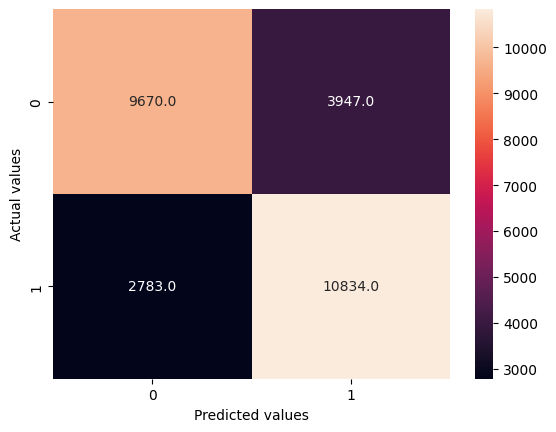

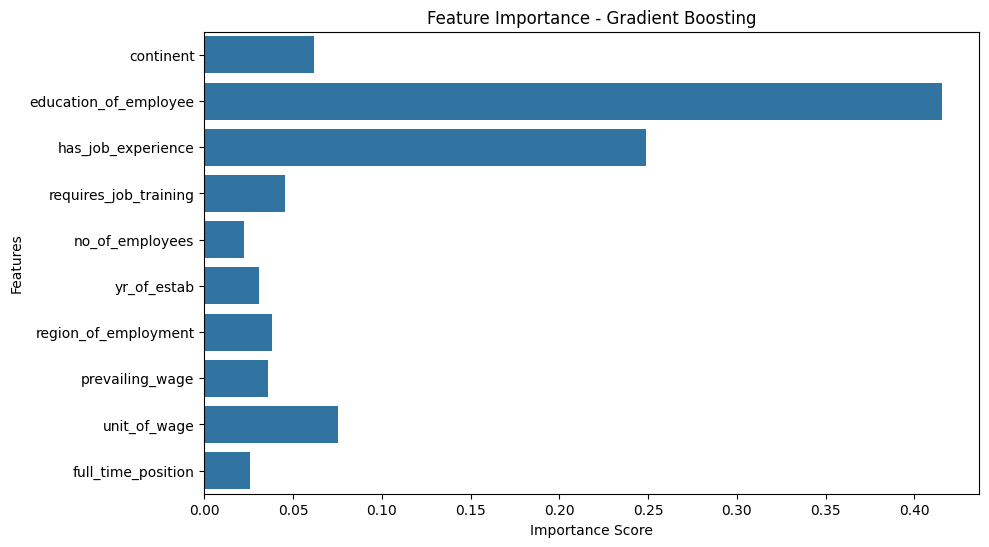

In [ ]:
#  Performance of final model(gradientboost) after selecting the best parameters on oversampled data

gb_best = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=100, random_state=1)


# Train on oversampled training data
gb_best.fit(x_train_over, y_train_over)


# Predict on validation data
y_pred_gb = gb_best.predict(x_train_over)

print("Gradient Boosting Performance:")
model_performance_classification_sklearn(gb_best, y_train_over, y_pred_gb)


# Feature importance plot for Gradient Boosting

feature_importances = gb_best.feature_importances_
features = x_train_over.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

The accuracy is 75 and recall is 79. This model predicted 2783 correctly out of 13617 which is quite good. The most important feature is education and then job experience.